In [3]:
import uproot
import hist
import awkward as ak
from matplotlib import pyplot as plt
import numpy as np
import mplhep as hep
from scipy import stats
from glob import glob
import seaborn as sns
from IPython.display import display
import pandas as pd
import math
import lightgbm

# Lista dei percorsi dei file .root
file_paths = [
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000001.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000002.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000003.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000004.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000005.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000006.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000007.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000008.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000009.root",
    "/storage_tmp/atlas/daviriva/Grid_download/user.driva.vertex_test_ggH_mc21_02_ANALYSIS.505772198/user.driva.34729059.ANALYSIS._000010.root"
]

# Inizializzo una lista vuota per i DataFrame
dfs = []

# Ciclo sui file e leggo i dati in DataFrame
for file_path in file_paths:
    file = uproot.open(file_path)
    tree = file["analysis"]
    data = tree.arrays(library='ak')
    df = ak.to_dataframe(data, how='outer')
    dfs.append(df)

# Unisco tutti i DataFrame in un unico DataFrame
df = pd.concat(dfs, ignore_index=True)

df

npv  vtx_type  vtx_nTrackParticles  truth_signal_vertex_x  \
0          27         1                   37              -0.521269   
1          27         3                   46              -0.521269   
2          27         3                   49              -0.521269   
3          27         3                   29              -0.521269   
4          27         3                   50              -0.521269   
...       ...       ...                  ...                    ...   
40252050   89         3                    3              -0.501374   
40252051   89         3                    3              -0.501374   
40252052   89         3                    2              -0.501374   
40252053   89         3                    2              -0.501374   
40252054   89         0                    0              -0.501374   

          truth_signal_vertex_y  truth_signal_vertex_z  vertex_errors  \
0                     -0.489982              19.253519              0   
1                     -0.489982              19.253519              0   
2                     -0.489982              19.253519              0   
3                     -0.489982              19.253519              0   
4                     -0.489982              19.253519              0   
...                         ...                    ...            ...   
40252050              -0.494217             -37.019485              0   
40252051              -0.494217             -37.019485              0   
40252052              -0.494217             -37.019485              0   
40252053              -0.494217             -37.019485              0   
40252054              -0.494217             -37.019485              0   

               ph_cl_E  ph_cl_eta  ph_cl_etaS1  ...  \
0         83697.453125  -0.330540    -0.330098  ...   
1         91451.062500  -0.645767    -0.645064  ...   
2         31360.164062   0.499916     0.496889  ...   
3                  NaN        NaN          NaN  ...   
4                  NaN        NaN          NaN  ...   
...                ...        ...          ...  ...   
40252050           NaN        NaN          NaN  ...   
40252051           NaN        NaN          NaN  ...   
40252052           NaN        NaN          NaN  ...   
40252053           NaN        NaN          NaN  ...   
40252054           NaN        NaN          NaN  ...   

          z_pointing_common_nphotons_5GeV  z_pointing_common_20GeV  \
0                                     3.0                19.840113   
1                                     3.0                19.840113   
2                                     3.0                19.840113   
3                                     3.0                19.840113   
4                                     3.0                19.840113   
...                                   ...                      ...   
40252050                             23.0               -51.610226   
40252051                             23.0               -51.610226   
40252052                             23.0               -51.610226   
40252053                             23.0               -51.610226   
40252054                             23.0               -51.610226   

          z_pointing_common_error_20GeV  z_pointing_common_nphotons_20GeV  \
0                              0.053936                               3.0   
1                              0.053936                               3.0   
2                              0.053936                               3.0   
3                              0.053936                               3.0   
4                              0.053936                               3.0   
...                                 ...                               ...   
40252050                       9.415226                               2.0   
40252051                       9.415226                               2.0   
40252052                       9.415226                               2.0   
40252053

In [4]:
df.columns

Index(['npv', 'vtx_type', 'vtx_nTrackParticles', 'truth_signal_vertex_x',
       'truth_signal_vertex_y', 'truth_signal_vertex_z', 'vertex_errors',
       'ph_cl_E', 'ph_cl_eta', 'ph_cl_etaS1', 'ph_cl_etaS2', 'ph_cl_phiS2',
       'ph_cl_phi', 'ph_Rconv', 'ph_zvertex', 'ph_errz', 'ph_HPV_zvertex',
       'ph_HPV_errz', 'ph_cl_R1', 'ph_cl_R2', 'ph_cl_Z1', 'ph_cl_Z2',
       'ph_truth_type', 'ph_truth_origin', 'ph_numberOfSiTracks',
       'ph_numberOfSiHits_trk1', 'ph_numberOfSiHits_trk2', 'ph_ptconv1',
       'ph_ptconv2', 'ph_ptconv', 'ph_convEtOverPt', 'ph_convType',
       'runNumber', 'eventNumber', 'actualInteractionsPerCrossing',
       'averageInteractionsPerCrossing', 'beamPosX', 'beamPosY', 'beamPosZ',
       'beamPosSigmaX', 'beamPosSigmaY', 'beamPosSigmaZ', 'vtx_x', 'vtx_y',
       'vtx_z', 'vtx_px', 'vtx_py', 'vtx_pz', 'vtx_sumPt', 'vtx_sumPt2',
       'vtx_chiSquared', 'vtx_numberDoF', 'vtx_isBest', 'HardScatterType',
       'vtx_MatchType', 'vtx_delta_z_mean', 'vtx_delta_

In [7]:
#Elimino i vertici di tipo 0 e controllo che ci sia sempre la flag 'best'
df = df[df['vtx_type']!=0]

mask_best_ok = ak.any(df['vtx_isBest'], axis=None)
print(f"there are {np.sum(~mask_best_ok)} events with no best vertex among {len(df)} events")

there are 0 events with no best vertex among 38752055 events


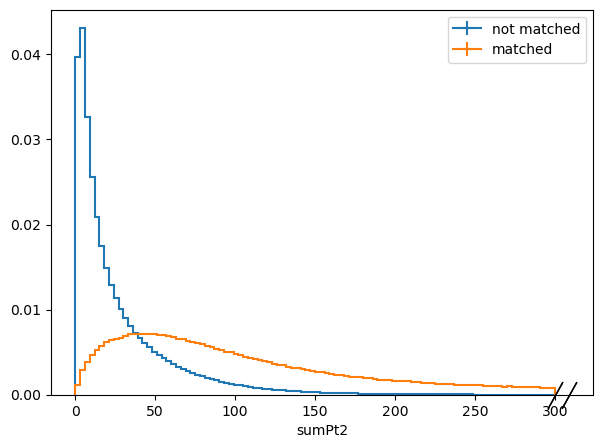

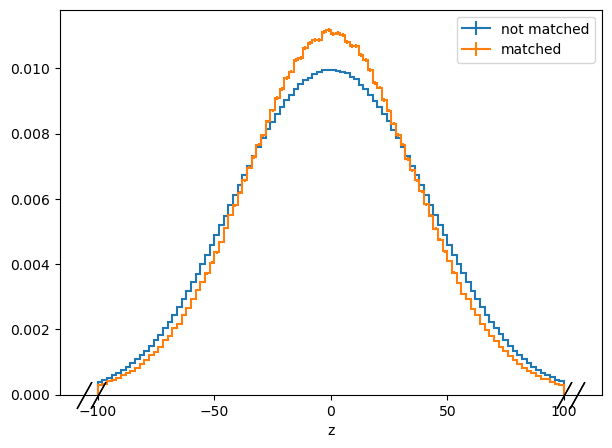

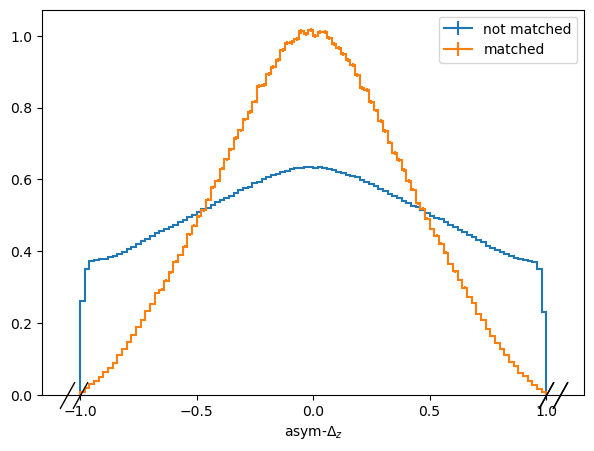

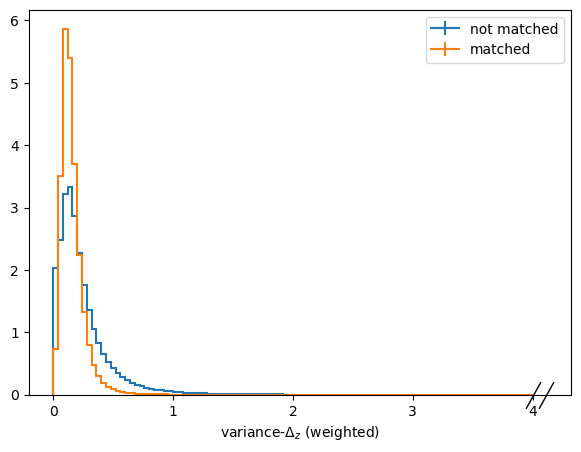

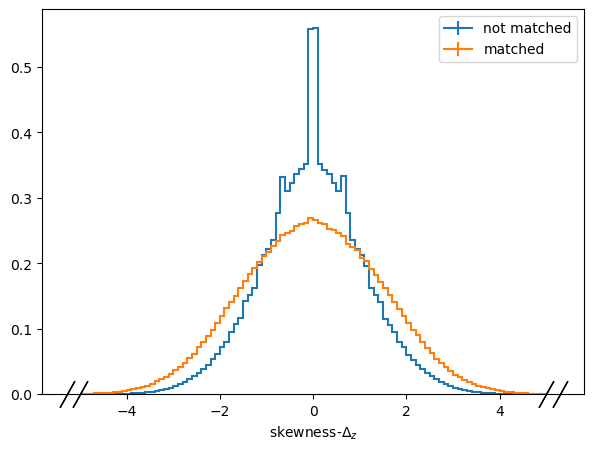

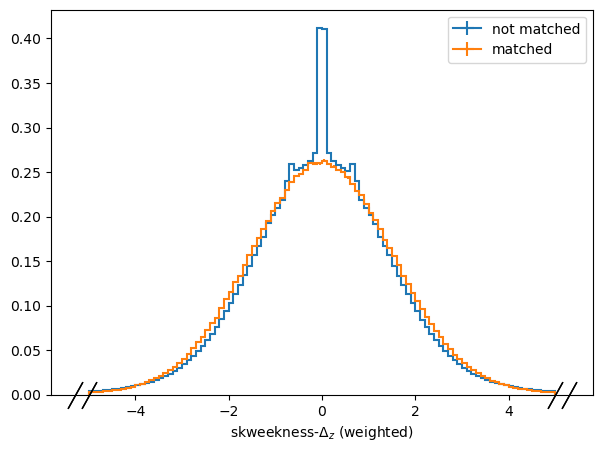

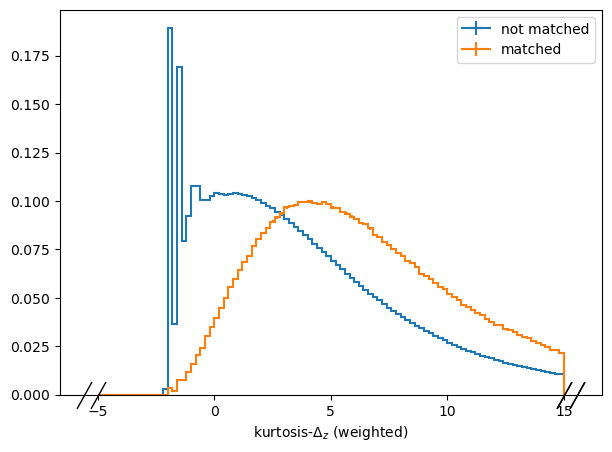

In [8]:
axes = {
    'vtx_sumPt2': hist.axis.Regular(100, 0, 300, name='sumPt2'),
    'vtx_sumPt': hist.axis.Regular(100, 0, 300, name='sumPt'),
    'vtx_nTrackParticles': hist.axis.Integer(0, 100, name='nTrackParticles'),
    'vtx_z': hist.axis.Regular(100, -100, 100, name='z'),
    'vtx_delta_z_mean': hist.axis.Regular(100, -3, 3, name='$<\Delta_z>$'),
    'vtx_delta_z_weighted_mean': hist.axis.Regular(100, -3, 3, name='$<\Delta_z>$ (weighted)'),
    'vtx_delta_z_asym': hist.axis.Regular(100, -1, 1, name='asym-$\Delta_z$'),
    'vtx_delta_z_weighted_asym': hist.axis.Regular(100, -1, 1, name='asym-$\Delta_z$ (weighted)'),
    'vtx_delta_z_variance': hist.axis.Regular(100, 0, 4, name='variance-$\Delta_z$'),
    'vtx_delta_z_weighted_variance': hist.axis.Regular(100, 0, 4, name='variance-$\Delta_z$ (weighted)'),
    'vtx_delta_z_skewness': hist.axis.Regular(100, -5, 5, name='skewness-$\Delta_z$'),
    'vtx_delta_z_weighted_skewness': hist.axis.Regular(100, -5, 5, name='skweekness-$\Delta_z$ (weighted)'),
    'vtx_delta_z_kurtosis': hist.axis.Regular(100, -5, 15, name='kurtosis-$\Delta_z$'),
    'vtx_delta_z_weighted_kurtosis': hist.axis.Regular(100, -5, 15, name='kurtosis-$\Delta_z$ (weighted)'),
}

quantites_to_plot = list(axes.keys())

mask_matched = df['vtx_isBest'] == 1
mask_not_matched = df['vtx_isBest'] == 0

for quantity in quantites_to_plot:
    h_not_matched = hist.Hist(axes[quantity])
    h_matched = hist.Hist(axes[quantity])

    h_not_matched.fill(ak.flatten(df[quantity][mask_not_matched], axis=None))
    h_matched.fill(ak.flatten(df[quantity][mask_matched], axis=None))

    fig, ax = plt.subplots(figsize=(7, 5))
    h_not_matched.plot(ax=ax, density=True, label='not matched')
    h_matched.plot(ax=ax, density=True, label='matched')
    ax.legend()
    plt.show()